# 선형회귀 개요

선형 회귀(線型回歸, Linear regression)는 종속 변수 y와 한 개 이상의 독립 변수X와의 선형 상관 관계를 모델링하는 회귀분석 기법. [위키백과](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80)

## 선형회귀 모델
- 각 Feature들에 가중치(Weight)를 곱하고 편향(bias)를 더해 예측 결과를 출력한다.
- Weight와 bias가 학습 대상 Parameter가 된다.

$$
\hat{y_i} = w_1 x_{i1} + w_2 x_{i2}... + w_{p} x_{ip} + b
\\
\hat{y_i} = \mathbf{w}^{T} \cdot \mathbf{X} 
$$

- $\hat{y_i}$: 예측값
- $x$: 특성(feature-컬럼)
- $w$: 가중치(weight), 회귀계수(regression coefficient). 특성이 $\hat{y_i}$ 에 얼마나 영향을 주는지 정도
- $b$: 절편
- $p$: p 번째 특성(feature)/p번째 가중치
- $i$: i번째 관측치(sample)

## LinearRegression
- 가장 기본적인 선형 회귀 모델
- 각 Feauture에 가중합으로 Y값을 추론한다.
### 데이터 전처리

- **선형회귀 모델사용시 전처리**
    - **범주형 Feature**
        - : 원핫 인코딩
    - **연속형 Feature**
        - Feature Scaling을 통해서 각 컬럼들의 값의 단위를 맞춰준다.
        - StandardScaler를 사용할 때 성능이 더 잘나오는 경향이 있다.

In [1]:
from dataset import get_boston_dataset
X_train, X_test, y_train, y_test = get_boston_dataset()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [4]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# 선형회귀 모델 생성
from sklearn.linear_model import LinearRegression
line_reg = LinearRegression()   # 하이퍼 파라미터가 따로 없음
line_reg.fit(X_train_scaled, y_train)

LinearRegression()

> ### Coeficient의 부호
> - weight가 
> - 양수: Feature가 1 증가할때 y(집값)도 weight만큼 증가한다.
> - 음수: Feature가 1 증가할때 y(집값)도 weight만큼 감소한다.
> - 절대값 기준으로 0에 가까울 수록 집값에 영향을 주지 않고 크면 클수록(0에서 멀어질 수록) 집값에 영향을 많이 주는 Feature 란 의미가 된다.

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [17]:
# 각 feature의 계수 -> 각 항에 곱해지는 값
import pandas as pd
pd.DataFrame(line_reg.coef_, index=X_train.columns).T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.460911,1.048771,-0.166722,0.880277,-1.979566,2.249428,0.339677,-2.862308,2.323268,-1.557996,-2.136995,0.900559,-4.104937


In [18]:
# bias (절편)
line_reg.intercept_

22.579419525065966

In [8]:
X_ = X_train.copy()
X_['y'] = y_train
X_

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
390,6.96215,0.0,18.10,0.0,0.700,5.713,97.0,1.9265,24.0,666.0,20.2,394.43,17.11,15.1
474,8.05579,0.0,18.10,0.0,0.584,5.427,95.4,2.4298,24.0,666.0,20.2,352.58,18.14,13.8
28,0.77299,0.0,8.14,0.0,0.538,6.495,94.4,4.4547,4.0,307.0,21.0,387.94,12.80,18.4
343,0.02543,55.0,3.78,0.0,0.484,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18,23.9
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34,21.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,0.36894,22.0,5.86,0.0,0.431,8.259,8.4,8.9067,7.0,330.0,19.1,396.90,3.54,42.8
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00,21.1
442,5.66637,0.0,18.10,0.0,0.740,6.219,100.0,2.0048,24.0,666.0,20.2,395.69,16.59,18.4
291,0.07886,80.0,4.95,0.0,0.411,7.148,27.7,5.1167,4.0,245.0,19.2,396.90,3.56,37.3


#### 각 항목에 대한 추론방식
##### $coef_0 \times x_0 + coef_1 \times x_1 + coef_2 \times x_2 + ... + coef_n \times x_n + bias = y(pred)$

In [19]:
# 0번째 데이터에 대한 추론
pred_0 = line_reg.predict(X_train_scaled[0].reshape(1, -1))
pred_0

array([17.59767048])

In [21]:
# 0번째 데이터에 대한 추론
# 각 항목에 계수값을 내적한 후 bias를 더함
X_train_scaled[0] @ line_reg.coef_ + line_reg.intercept_

17.597670478245465

In [26]:
# 데이터에 대한 추론
pred2_ = X_train_scaled @ line_reg.coef_.reshape(-1, 1) + line_reg.intercept_
pred2_

array([[17.59767048],
       [16.91806808],
       [19.72403743],
       [28.02021706],
       [21.26422083],
       [17.74527355],
       [17.53706079],
       [17.36472947],
       [17.95706279],
       [18.94759392],
       [19.75772585],
       [35.6421676 ],
       [27.61639663],
       [16.53717978],
       [22.34949546],
       [20.69679461],
       [31.88966091],
       [12.24853538],
       [13.76485428],
       [24.02415759],
       [16.14926316],
       [13.82614283],
       [16.34871575],
       [27.79140705],
       [23.50303613],
       [28.45852287],
       [23.6437011 ],
       [19.94909904],
       [21.25320755],
       [ 9.7484128 ],
       [31.57785985],
       [21.48068719],
       [25.89597626],
       [36.31811948],
       [18.20270308],
       [21.46196844],
       [20.44547369],
       [12.83920746],
       [20.97170464],
       [18.01456364],
       [40.59313252],
       [31.8823775 ],
       [21.27076911],
       [29.86339282],
       [22.99333532],
       [23

In [28]:
pred2_.flatten() == line_reg.predict(X_train_scaled)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

##### 평가

In [6]:
pred_train = line_reg.predict(X_train_scaled)
pred_test = line_reg.predict(X_test_scaled)

from metrics import print_metrics_regression as pmr

pmr(y_train, pred_train, title='Linear Regression train')
pmr(y_test, pred_test, title='Linear Regression test')

==========Linear Regression train==========
MAE: 3.3851968027571853
MSE: 23.327378902305774
RMSE: 4.829842533903748
R2 Score: 0.717672243569379
==========Linear Regression test==========
MAE: 3.1635051115298656
MSE: 18.96659799622575
RMSE: 4.35506578552216
R2 Score: 0.788669757494949


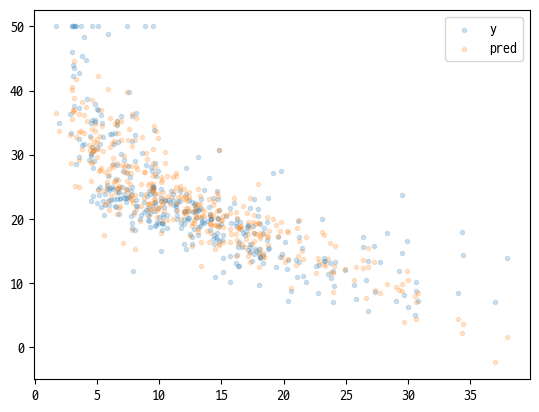

In [31]:
# X값에 대한 y값과 추론값의 scatter plot
import matplotlib.pyplot as plt
plt.scatter(X_train['LSTAT'], y_train, label='y', alpha=0.2, marker='.')
plt.scatter(X_train['LSTAT'], pred_train, label='pred', alpha=0.2, marker='.')
plt.legend()
plt.show()

In [71]:
y_test_array = y_test.values

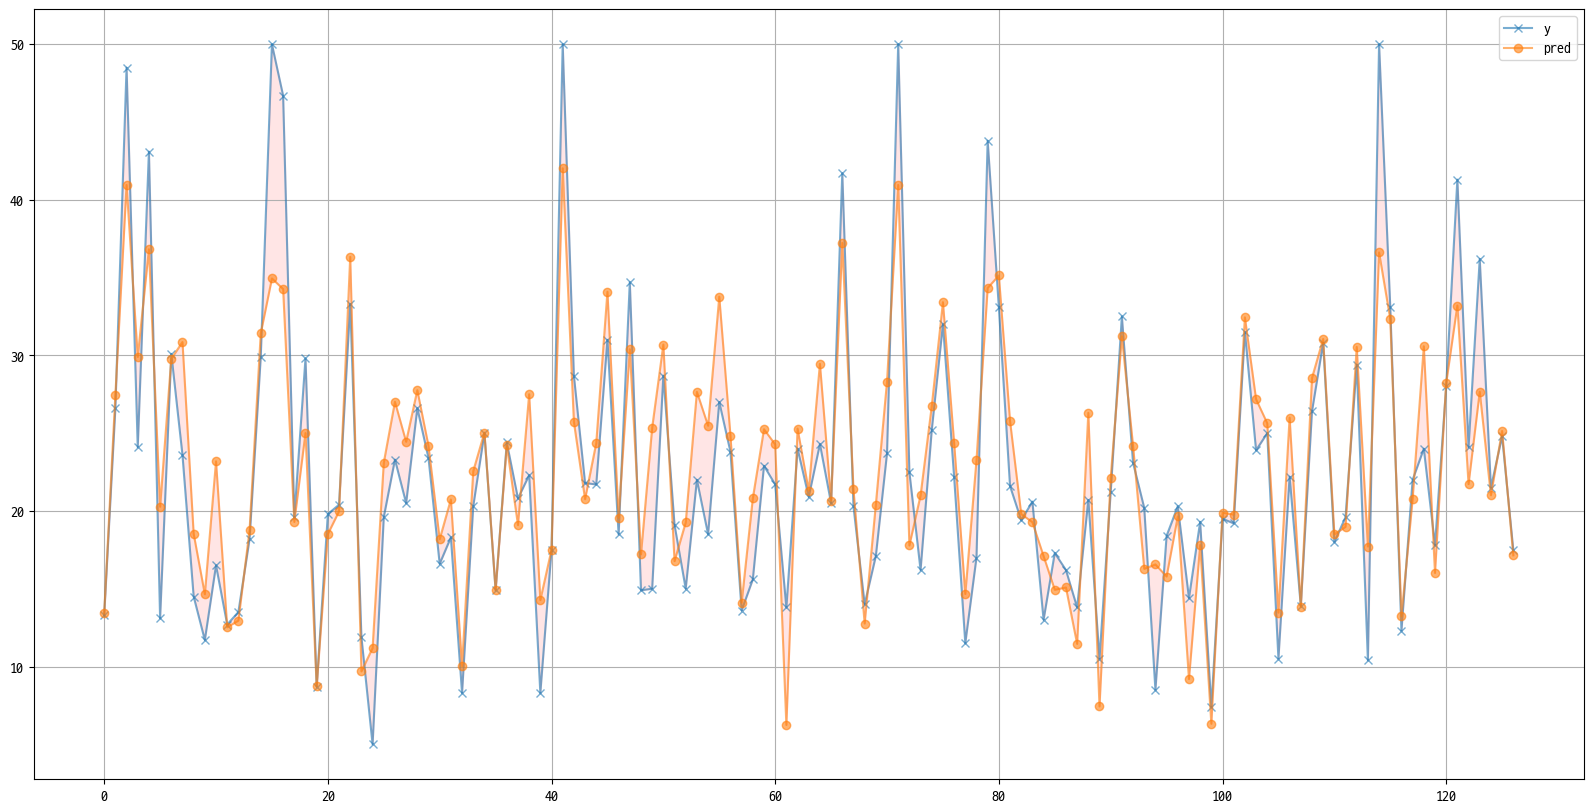

In [79]:
# y값과 추론값의 비교 (x축은 index)
x= range(len(y_test))
plt.figure(figsize=(20, 10))
plt.plot(x, y_test, label='y', marker='x', alpha=0.6)
plt.plot(x, pred_test, label='pred', marker='o', alpha=0.6)
# # 각 데이터에 대한 실제값과 추론값의 차이를 각 자리에 표시
# for i in x:
#     plt.plot([i, i], [y_test_array[i], pred_test[i]], color='red', alpha=.8)
# 각 데이터 사이를 채움
plt.fill_between(x, y_test_array, pred_test, color='red', alpha=.1)

plt.legend()
plt.grid()
plt.show()


# 다항회귀 (Polynomial Regression)
- 전처리방식 중 하나로 Feature가 너무 적어 y의 값들을 다 설명하지 못하여 underfitting이 된 경우 Feature를 늘려준다.
- 각 Feature들을 거듭제곱한 것과 Feature들 끼리 곱한 새로운 특성들을 추가한다.
    - 파라미터 가중치를 기준으로는 일차식이 되어 선형모델이다. 입력데이터(X)들을 기준으로는 N차식이 되어 비선형 데이터를 추론할 수 있는 모델이 된다.
- `PolynomialFeatures` Transformer를 사용해서 변환한다.

## 예제

##### 데이터셋 만들기

##### 모델생성, 학습

##### PolynomialFeatures를 이용해 다항회귀구현

##### LinearRegression 모델을 이용해 평가

##### 시각화

## degree를 크게
- Feature가 너무 많으면 Overfitting 문제가 생긴다.

### PolynomialFeatures 예제

### PolynomialFeatures를 Boston Dataset에 적용

##### 모델 생성 학습 추론 평가

## 규제 (Regularization)
- 선형 회귀 모델에서 과대적합(Overfitting) 문제를 해결하기 위해 가중치(회귀계수)에 페널티 값을 적용한다.
- 입력데이터의 Feature들이 너무 많은 경우 Overfitting이 발생.
    - Feature수에 비해 관측치 수가 적은 경우 모델이 복잡해 지면서 Overfitting이 발생한다.
- 해결
    - 데이터를 더 수집한다. 
    - Feature selection
        - 불필요한 Features들을 제거한다.
    - 규제 (Regularization) 을 통해 Feature들에 곱해지는 가중치가 커지지 않도록 제한한다.(0에 가까운 값으로 만들어 준다.)
        - LinearRegression의 규제는 학습시 계산하는 오차를 키워서 모델이 오차를 줄이기 위해 가중치를 0에 가까운 값으로 만들도록 하는 방식을 사용한다.
        - L1 규제 (Lasso)
        - L2 규제 (Ridge)
    

## Ridge Regression (L2 규제)
- 손실함수(loss function)에 규제항으로 $\alpha \sum_{i=1}^{n}{w_{i}^{2}}$ (L2 Norm)을 더해준다.
- $\alpha$는 하이퍼파라미터로 모델을 얼마나 많이 규제할지 조절한다. 
    - $\alpha = 0$ 에 가까울수록 규제가 약해진다. (0일 경우 선형 회귀동일)
    - $\alpha$ 가 커질 수록 모든 가중치가 작아져 입력데이터의 Feature들 중 중요하지 않은 Feature의 예측에 대한 영향력이 작아지게 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \cfrac{1}{2}\sum_{i=1}^{n}{w_{i}^{2}}
$$

> **손실함수(Loss Function):** 모델의 예측한 값과 실제값 사이의 차이를 정의하는 함수로 모델이 학습할 때 사용된다.

## Lasso(Least Absolut Shrinkage and Selection Operator) Regression (L1 규제)

- 손실함수에 규제항으로 $\alpha \sum_{i=1}^{n}{\left| w_i \right|}$ (L1 Norm)더한다.
- Lasso 회귀의 상대적으로 덜 중요한 특성의 가중치를 0으로 만들어 자동으로 Feature Selection이 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{\left| w_i \right|}
$$

# 정리
- 일반적으로 선형회귀의 경우 어느정도 규제가 있는 경우가 성능이 좋다.
- 기본적으로 **Ridge**를 사용한다.
- Target에 영향을 주는 Feature가 몇 개뿐일 경우 특성의 가중치를 0으로 만들어 주는 **Lasso** 사용한다. 